# Logistic Regression - Scikit-learn Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

Dataset shape: (891, 12)

First 5 rows:
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500

Missing values:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

Survival rate: 38.38%

Class distribution:
1    216
2    184
3    491
Name: Pclass, dtype: int64

Sex distribution:
male      577
female    314
Name: Sex, dtype: int64

Basic statistics:
              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000 

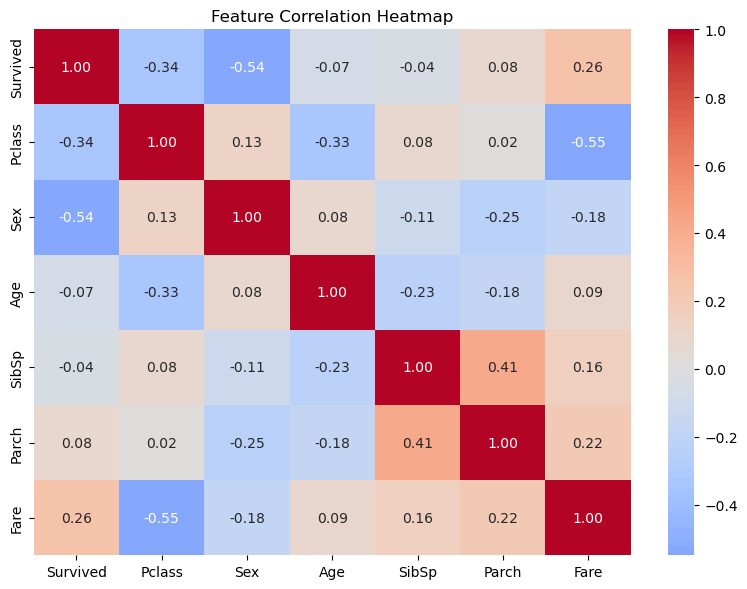

In [2]:
df = pd.read_csv("../train.csv")

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].head())
print(f"\nMissing values:")
print(df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].isnull().sum())
print(f"\nSurvival rate: {df['Survived'].mean():.2%}")
print(f"\nClass distribution:")
print(df['Pclass'].value_counts().sort_index())
print(f"\nSex distribution:")
print(df['Sex'].value_counts())
print(f"\nBasic statistics:")
print(df[["Age", "SibSp", "Parch", "Fare"]].describe())

df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
df["Age"].fillna(df["Age"].mean(), inplace=True)

df_viz = df.copy()
df_viz["Sex"] = (df_viz["Sex"] == "male").astype(int)
plt.figure(figsize=(8, 6))
sns.heatmap(df_viz.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('images/logistic_regression_sklearn_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

df["Sex"] = (df["Sex"] == "male").astype(int)

X_full = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].to_numpy(dtype=float)
y_full = df["Survived"].to_numpy(dtype=float)
m_full, n = X_full.shape

In [3]:
rng = np.random.default_rng(42)
perm = rng.permutation(m_full)

m_train = int(0.80 * m_full)
m_val = int(0.10 * m_full)
m_test = m_full - m_train - m_val

idx_train = perm[:m_train]
idx_val = perm[m_train:m_train+m_val]
idx_test = perm[m_train+m_val:]

X_train, y_train = X_full[idx_train], y_full[idx_train]
X_val, y_val = X_full[idx_val], y_full[idx_val]
X_test, y_test = X_full[idx_test], y_full[idx_test]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Train: {m_train}, Validation: {m_val}, Test: {m_test}")

Train: 712, Validation: 89, Test: 90


In [4]:
model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.8076
Validation Accuracy: 0.6966
Test Accuracy: 0.7889


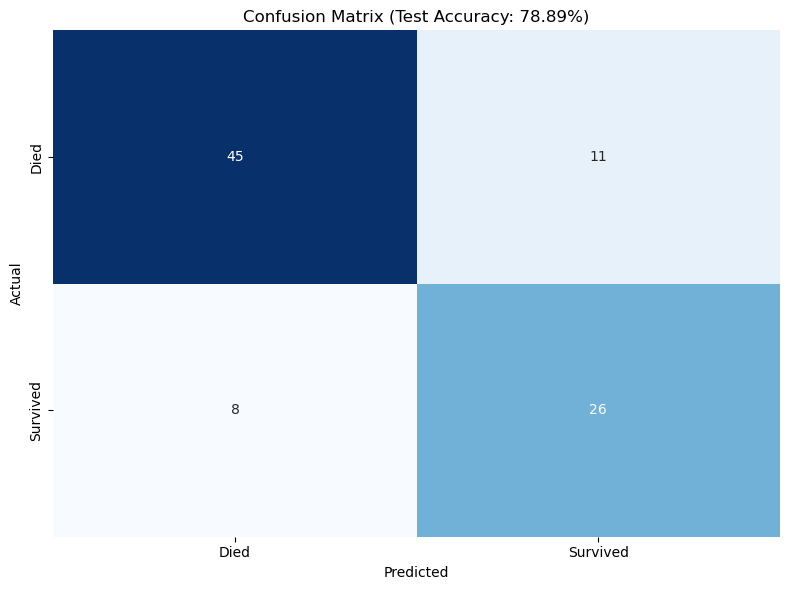

In [5]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Test Accuracy: {test_acc:.2%})')
plt.tight_layout()
plt.savefig('images/logistic_regression_sklearn_results.png', dpi=150, bbox_inches='tight')
plt.show()